**Trabalho 3 IA - K-means**

Implementação de um modelo K-means para a classifição de 3 espécies diferentes de pinguins: Adelie, Gentoo e Chinstrap.



Link do dataset utilizado: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [73]:
# Carregar o dataset
pinguim = pd.read_csv("penguins_size.csv")
pinguim.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [48]:
# Pré-processamento de dados

pinguim.isnull().sum() # Quantidade de dados faltando de cada coluna

# Excluindo dados faltantes
pinguim = pinguim.drop(columns = ['sex'], errors='ignore')  #excluindo a coluna sex
# Preencher valores nulos com a média da coluna
for column in pinguim.select_dtypes(include=np.number).columns:
    pinguim[column].fillna(pinguim[column].mean(), inplace=True)
                          
pinguim.isnull().sum() #conferindo

C:\Users\augus\AppData\Local\Temp\ipykernel_12264\3488591853.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pinguim[column].fillna(pinguim[column].mean(), inplace=True)


species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [50]:
# Correlação -> encontrando as caracteristícas que mais impactam
pinguim.select_dtypes(include=np.number).corr() #correlação apenas em colunas numéricas

# As variáveis que possuem maior correlação são body(massa corporal) e flipper(nadadeira): 0.871202	

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [56]:
# Selecionando as Features
selected_features = ['body_mass_g', 'flipper_length_mm']

# Normalizando os dados
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(pinguim[selected_features])

# Criando um DataFrame com os dados escalonados
dados_scaled = pd.DataFrame(dados_scaled, columns=selected_features)

# Verificando o resultado
dados_scaled.head()

,body_mass_g,flipper_length_mm
0,-0.565789,-1.422488
1,-0.503168,-1.065352
2,-1.192003,-0.422507
3,0.000000,0.000000
4,-0.941517,-0.565361


In [1]:
# Usar as features normalizadas
X = dados_scaled
y = pinguim['species']

# Dividir os dados normalizados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo K-means com o conjunto de treino
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Prever os clusters no conjunto de teste
clusters = kmeans.predict(X_test)

# Mapear clusters para rótulos reais usando o rótulo majoritário de cada cluster
labels = np.zeros_like(clusters)
for i in range(3):  # Considerando que há 3 clusters
    mask = (clusters == i)
    if np.any(mask):  # Verifica se há elementos no cluster
        labels[mask] = y_test[mask].mode()[0]  # Atribui o rótulo mais comum ao cluster

# Calcular a acurácia
accuracy = accuracy_score(y_test, labels)
print(f'Acurácia: {accuracy * 100:.2f}%')

NameError: name 'dados_scaled' is not defined

In [57]:
# Aplicando K-MEANS

n_clusters = 3 # um cluster para cada espécie

# Inicializando um objeto K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Dando fit no modelo
kmeans.fit(dados_scaled)

# Pegando as labels dos clusters
cluster_labels = kmeans.labels_

# Adicionando as labels nos dados originais
dados_scaled['Cluster'] = cluster_labels

# Mostrando as primeiras linhas do novo DataFrame com as labels dos clusters
dados_scaled.head()


,body_mass_g,flipper_length_mm,Cluster
0,-0.565789,-1.422488,0
1,-0.503168,-1.065352,0
2,-1.192003,-0.422507,0
3,0.000000,0.000000,2
4,-0.941517,-0.565361,0


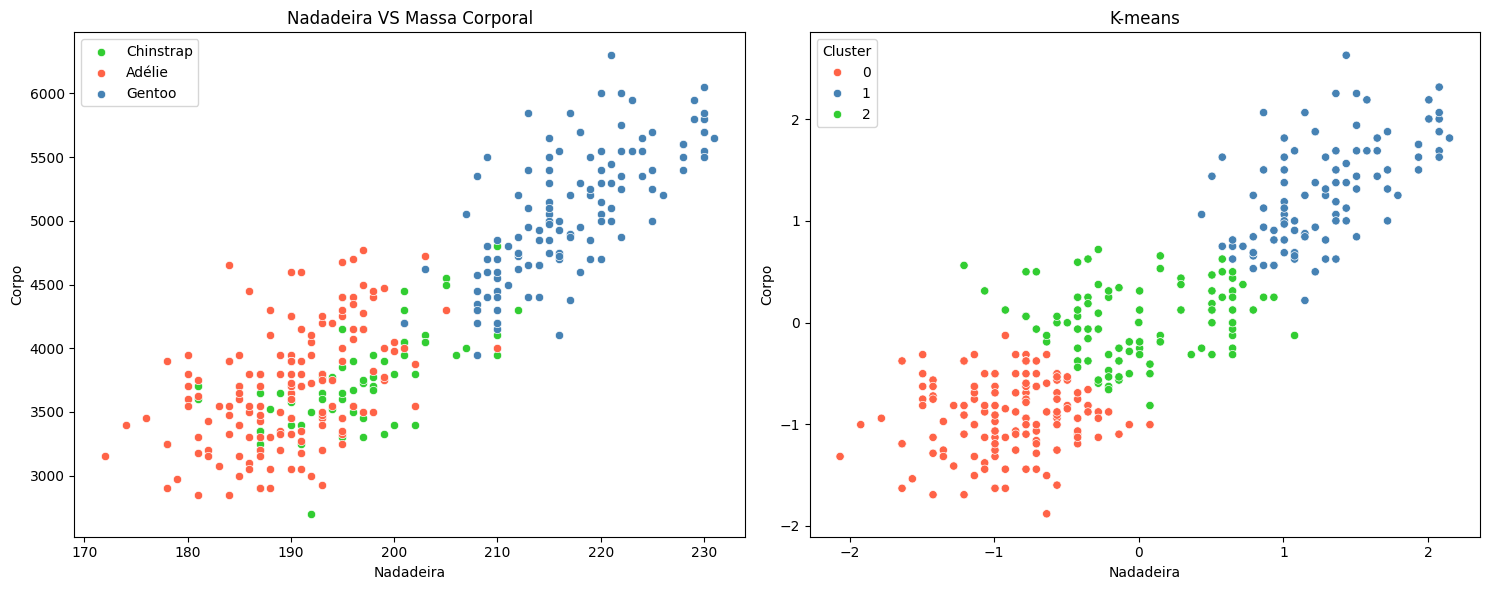

In [71]:
# Gráfico comparativo entre as espécies reais e com os clusters

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Primeiro gráfico
sns.scatterplot(
    data=pinguim[pinguim.species == 'Chinstrap'], 
    x='flipper_length_mm', y='body_mass_g', color='#32CD32', label='Chinstrap', ax=ax1
)
sns.scatterplot(
    data=pinguim[pinguim.species == 'Adelie'], 
    x='flipper_length_mm', y='body_mass_g', color='#FF6347', label='Adélie', ax=ax1
)
sns.scatterplot(
    data=pinguim[pinguim.species == 'Gentoo'], 
    x='flipper_length_mm', y='body_mass_g', color='#4682B4', label='Gentoo', ax=ax1
)
ax1.set_xlabel("Nadadeira")
ax1.set_ylabel("Corpo")
ax1.set_title("Nadadeira VS Massa Corporal")
ax1.legend()  # Exibir a legenda para identificar as espécies

# Segundo gráfico
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='Cluster', data=dados_scaled, 
                palette=['#FF6347', '#4682B4', '#32CD32'], ax=ax2)

ax2.set_title('K-means')
ax2.set_xlabel('Nadadeira')
ax2.set_ylabel('Corpo')

# Ajustar layout e exibir gráficos
plt.tight_layout()
plt.show()

# Análise:
# Quanto maior nadadeira -> maior o peso
# Espécies semelhantes: Chinstrap e Adélie (dificulta a classificação)

In [62]:
# Soma dos quadrados das distâncias
kmeans.inertia_

121.42824542104981